In [1]:
import numpy
import pandas as pd
from sklearn import preprocessing
numpy.random.seed(10)

In [2]:
all_df = pd.read_csv("data/titanic.csv")

In [3]:
cols=['survived','pclass' ,'sex', 'age',
       'fare',]
df=all_df[cols]
df.isnull().sum()

survived    0
pclass      0
sex         0
age         0
fare        0
dtype: int64

In [4]:
msk = numpy.random.rand(len(df)) < 0.8
train_df = df[msk]
test_df = df[~msk]
print('total:',len(df),
      'train:',len(train_df),
      'test:',len(test_df))

total: 1308 train: 1033 test: 275


In [5]:
trainray= train_df.values
train_Features = trainray[:,1:]
train_Label = trainray[:,0]
    
testray= test_df.values
test_Features = testray[:,1:]
test_Label = testray[:,0]

minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
train_Features=minmax_scale.fit_transform(train_Features)  
test_Features=minmax_scale.fit_transform(test_Features)

In [6]:
train_Features[355:359]

array([[0.5       , 1.        , 0.48532708, 0.02513033],
       [0.5       , 1.        , 0.82392769, 0.02410559],
       [0.5       , 1.        , 0.67494342, 0.05074862],
       [0.5       , 0.        , 0.56659123, 0.05074862]])

In [7]:
train_Label[:4]

array([1., 1., 0., 0.])

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

Using TensorFlow backend.


In [9]:
model = Sequential()

In [10]:
model.add(Dense(units=40, input_dim=4, 
                kernel_initializer='uniform', 
                activation='relu'))

In [11]:
model.add(Dense(units=30, 
                kernel_initializer='uniform', 
                activation='relu'))

In [12]:
model.add(Dense(units=20, 
                kernel_initializer='uniform', 
                activation='relu'))

In [13]:
model.add(Dense(units=10, 
                kernel_initializer='uniform', 
                activation='relu'))

In [14]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                200       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1230      
_________________________________________________________________
dense_3 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 2,271
Trainable params: 2,271
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [17]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=30,verbose=2)

Train on 929 samples, validate on 104 samples
Epoch 1/30
 - 2s - loss: 0.6920 - acc: 0.5791 - val_loss: 0.6862 - val_acc: 0.7404
Epoch 2/30
 - 0s - loss: 0.6870 - acc: 0.5985 - val_loss: 0.6626 - val_acc: 0.7404
Epoch 3/30
 - 0s - loss: 0.6613 - acc: 0.5985 - val_loss: 0.5578 - val_acc: 0.7404
Epoch 4/30
 - 0s - loss: 0.6096 - acc: 0.5985 - val_loss: 0.5094 - val_acc: 0.7404
Epoch 5/30
 - 0s - loss: 0.5783 - acc: 0.5985 - val_loss: 0.4705 - val_acc: 0.7404
Epoch 6/30
 - 0s - loss: 0.5696 - acc: 0.6297 - val_loss: 0.4665 - val_acc: 0.7404
Epoch 7/30
 - 0s - loss: 0.5666 - acc: 0.7847 - val_loss: 0.4641 - val_acc: 0.7404
Epoch 8/30
 - 0s - loss: 0.5634 - acc: 0.7793 - val_loss: 0.4626 - val_acc: 0.7115
Epoch 9/30
 - 0s - loss: 0.5601 - acc: 0.7847 - val_loss: 0.4588 - val_acc: 0.7115
Epoch 10/30
 - 0s - loss: 0.5579 - acc: 0.7718 - val_loss: 0.4579 - val_acc: 0.7212
Epoch 11/30
 - 0s - loss: 0.5548 - acc: 0.7804 - val_loss: 0.4575 - val_acc: 0.7404
Epoch 12/30
 - 0s - loss: 0.5520 - acc:

In [18]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

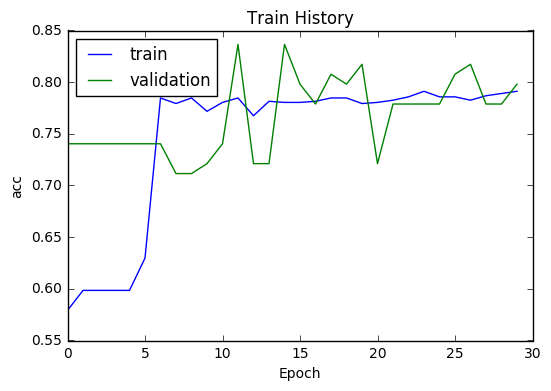

In [19]:
show_train_history(train_history,'acc','val_acc')

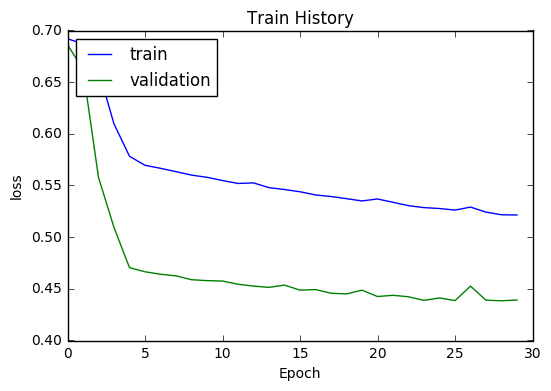

In [20]:
show_train_history(train_history,'loss','val_loss')

In [21]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

275/275 [==============================] - 0s 88us/step


In [22]:
scores[1]

0.7927272731607611